In [1]:
import sys
sys.path.append('../.')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load data**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = 'ecoli'
X = pd.read_csv('data/ecoli.csv')
ind = list(range(len(X.columns)))
col_list = X.columns[ind]
ct = ColumnTransformer([('scaler', StandardScaler(), col_list)], remainder='passthrough')

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,eutG,sucA,atpG,flgD,sucD,yhdM,dnaJ,gltA,b1191,ygcE,...,pspA,nmpC,yheI,ycgX,dnaG,folK,b1963,dnaK,mopB,ftsJ
0,-0.027759,0.122599,0.264658,0.153671,-0.043405,-0.542246,0.619729,0.084389,-0.033762,0.077002,...,-1.156587,1.542883,-0.043889,-0.338571,-0.430860,-0.336886,-0.222453,0.315515,0.629529,0.488032
1,0.645966,-1.182445,-0.297893,-0.958127,-1.348025,0.239957,0.669959,-2.574957,-1.916479,-2.269440,...,0.473894,-0.614861,-2.270004,-1.746693,-1.686743,-2.147293,-2.143699,-2.509647,-2.754116,-2.406968
2,-0.878432,0.415826,-0.418150,0.188152,0.720372,-0.339575,0.828943,0.127842,1.275507,1.133740,...,1.014847,-1.652255,0.251795,0.320190,0.420012,0.150618,-0.217249,0.413813,0.236786,-0.205489
3,-0.458864,0.296419,0.381965,-0.282977,1.698835,0.027809,-1.067956,-2.038131,-0.197604,-0.155425,...,-0.401261,1.322398,-0.196608,-0.457251,-0.027710,-0.278149,0.004377,-0.212255,-0.489394,-0.719893
4,-0.687974,0.685775,0.989306,0.398356,1.347598,-1.213816,-0.896065,-0.525506,-0.363537,0.036631,...,2.540371,-1.535672,-1.128562,-0.764837,-1.085189,-1.031513,-1.461310,-1.059138,-0.743434,-0.567452


**Fit model**

In [3]:
from sklearn.model_selection import train_test_split
from GoggleModel import GoggleModel

In [4]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=64,
    decoder_l=2,
    threshold=0.1,
    het_decoder=False,
    graph_prior=None,
    prior_mask=None,
    device='cuda',
    beta=1,
    seed=0
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=46, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=46, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=46, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): SAGEConv(
        (feat_drop): Dropout(p=0.0, inplace=False)
        (activation): Tanh()
        (fc_self): Linear(in_features=64, out_features=32, bias=False)
        (fc_neigh): Linear(in_features=64, out_features=32, bias=False)
      )
      (1): SAGEConv(
        (feat_drop): Dropout(p=0.0, inplace=False)
        (fc_self): Linear(in_features=32, out_features=1, bias=False)
        (fc_neigh): Linear(in_features=32, out_features=1, bias=False)
      )
    )
  )
)

In [5]:
gen.fit(X_train)

[Epoch  50/1000, patience  2] train: 21.768, val: 22.307
[Epoch 100/1000, patience 11] train: 21.749, val: 21.639
Training terminated after 138 epochs


**Evaluate synthetic data**

In [6]:
X_synth = gen.sample(X_test)
X_synth.head()

,eutG,sucA,atpG,flgD,sucD,yhdM,dnaJ,gltA,b1191,ygcE,...,pspA,nmpC,yheI,ycgX,dnaG,folK,b1963,dnaK,mopB,ftsJ
0,0.665071,0.378751,0.465610,0.597834,0.525454,-0.367325,-0.518707,0.564942,0.829952,0.694321,...,-0.432469,0.054404,0.334653,0.210031,0.205396,0.295291,0.207255,0.344759,0.418371,0.259815
1,0.201539,-0.241632,-0.015045,-0.143499,0.057083,-0.136738,-0.286482,-0.152499,1.536270,1.165372,...,-1.661927,0.622526,0.856499,0.474622,0.489341,0.849454,0.689992,0.699588,0.713686,0.581207
2,0.591269,0.622953,0.547825,0.845848,0.869415,-0.577481,-0.819046,0.531717,0.531434,0.558999,...,-0.242645,-0.499103,0.045030,-0.040175,-0.046573,0.030903,0.015919,0.157123,0.318194,0.247590
3,-0.490880,0.392468,0.278526,0.436047,0.572667,-0.525116,-0.721026,0.239175,0.079412,0.205253,...,0.945081,-0.860263,-0.076426,-0.031546,-0.074571,-0.123853,-0.052201,-0.022594,0.047547,-0.030808
4,-0.001425,0.427424,0.354850,0.525155,0.701747,-0.694307,-1.024063,-0.076919,0.450180,0.437264,...,0.690793,-1.196503,-0.416317,-0.630984,-0.637580,-0.366492,-0.473871,-0.388337,-0.402803,-0.486988


In [7]:
res = gen.evaluate_synthetic(X_synth, X_test)
print(f'Quality: {res[0]:.3f}')
print(f'Detection: {res[2]:.3f}')
print(f'Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}')

Evaluating regression performance...
Evaluating regression performance...
Evaluating regression performance...
Quality: 0.647
Detection: 0.712
Performance on real: 0.148, on synth: 0.150


**Generate TSNE plots**

In [8]:
X_test['label'] = 'Original'
X_synth['label'] = 'Synthetic'

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df['label']
x_data = concat_df.drop(['label', 'ftsJ'], axis=1)

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

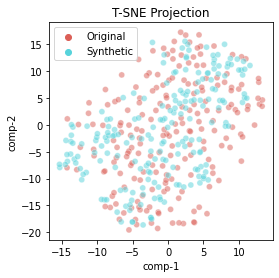

In [10]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2), alpha=0.5,
                data=df).set(title=f"T-SNE Projection")
plt.xlabel('comp-1')
plt.ylabel('comp-2')
plt.legend()

plt.show()

**Visualise adjacency matrix**

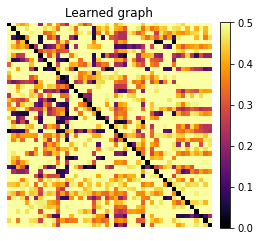

In [11]:
adj_matrix = gen.model.learned_graph(None).cpu().detach().numpy()
adj_matrix = np.abs(adj_matrix)
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap='inferno', interpolation='nearest', vmin=0, vmax=0.5)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Learned graph')
plt.axis('off')
plt.show()